# 03 - Morgan fingerprints

In this notebook Morgan fingerprints, a heatmap, a dendogram and similarity maps are created to gain further insight in the structure of UMP and the ligands that were selected. 

In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.DataStructs import TanimotoSimilarity
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from rdkit import Chem, DataStructs
from sklearn.metrics import pairwise_distances
import seaborn as sns

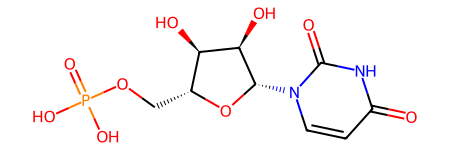

In [2]:
#Check if the UMP molecule is correctly drawn from the SMILES
m = Chem.MolFromSmiles('O=c1ccn([C@@H]2O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1')
m

In [3]:
#Before creating the Morgan fingerprint structure, a simple empty dictionary should be created to store the information about it.
#Second step is to use GetMorganFingerprintAsBitVect() to create morgan fingerprint and store is as a bitvector too
bit={}
morganfp=AllChem.GetMorganFingerprintAsBitVect(m,useChirality=True, radius=5, nBits = 1024, bitInfo=bit)

[23:08:12] DEPRECATION WARNING: please use MorganGenerator


In [4]:
#Confirm that the morgan fp object is created
morganfp

In [5]:
#
#Remember the mol object wil be structured as 0s and 1s in the end and 1s will represent
#the mapped molecule fingerprints while np.array and np.zero functions will be created for further vector processing
#np.nonzero function to indentify the positions of the present molecular structurs
mfpvector = np.array(morganfp)
print(np.nonzero(mfpvector))

(array([  59,   77,   80,   81,   86,   90,   95,  112,  122,  162,  182,
        192,  233,  253,  269,  288,  289,  295,  314,  343,  356,  363,
        377,  426,  486,  495,  498,  519,  531,  551,  562,  564,  577,
        587,  591,  640,  643,  650,  656,  692,  695,  705,  721,  725,
        726,  758,  779,  791,  795,  797,  801,  805,  807,  814,  831,
        849,  871,  897,  935,  950,  954,  976,  979,  986, 1019]),)


{75: ((6, 2),), 80: ((8, 0),), 81: ((1, 1),), 192: ((10, 0),), 253: ((9, 2),), 295: ((10, 2),), 314: ((0, 1), (19, 1)), 454: ((16, 2),), 486: ((11, 1),), 564: ((20, 2),), 577: ((4, 1),), 610: ((7, 1),), 650: ((0, 0), (11, 0), (19, 0)), 656: ((6, 0),), 695: ((9, 0),), 758: ((18, 1),), 807: ((12, 0), (13, 0), (15, 0), (17, 0)), 863: ((8, 2),), 935: ((4, 0),), 1019: ((5, 0), (7, 0), (14, 0), (16, 0)), 1099: ((5, 2),), 1101: ((3, 1),), 1114: ((20, 0),), 1136: ((8, 1),), 1176: ((5, 1),), 1257: ((15, 1), (17, 1)), 1380: ((1, 0), (18, 0)), 1401: ((18, 2),), 1438: ((4, 2),), 1487: ((14, 1), (16, 1)), 1522: ((3, 2),), 1611: ((1, 2),), 1716: ((9, 1),), 1745: ((20, 1),), 1750: ((2, 1),), 1819: ((10, 1),), 1838: ((12, 1), (13, 1)), 1844: ((14, 2),), 1873: ((2, 0), (3, 0)), 1878: ((7, 2),), 1921: ((6, 1),), 2000: ((2, 2),)}


[23:08:12] DEPRECATION WARNING: please use MorganGenerator


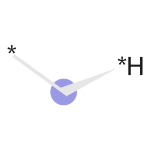

In [6]:
# The UMP molecule
m = Chem.MolFromSmiles('O=c1ccn([C@@H]2O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1')

# Generate the Morgan Fingerprint
bi1 = {}  # Dictionary to store bit information
fp = GetMorganFingerprintAsBitVect(m, 2, bitInfo=bi1)

#The bit information from this will be presented using the print formula. From this the different atom complexes can be determined related to the UMP molecule and then draw with DrawMorganBit. 
print(bi1)

#The first bit that will be drawn from the UMP molecule will be 80. 
Draw.DrawMorganBit(m, 80, bi1)

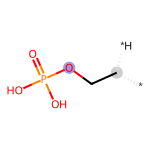

In [7]:
Draw.DrawMorganBit(m,253 , bi1)

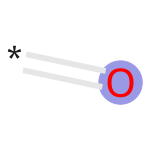

In [8]:
Draw.DrawMorganBit(m,650 , bi1)

These Morgan Fingerprints above are drawn to get familair with the different bits. It can be seen that a higher bit number contribute to a more complex structure of the molecule. These Fingerprints display the different structures in the molecule and the atom complexes. 

In [9]:
# Define the UMP molecule 
molecule = Chem.MolFromSmiles('O=c1ccn([C@@H]2O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1')  # Example UMP

# Generate the Morgan Fingerprint and get bit information
bit_info = {}  # Dictionary to store bit information
fingerprint = GetMorganFingerprintAsBitVect(molecule, 2, nBits=2048, bitInfo=bit_info)

# Function to display bit structure for specific substructure
def draw_morgan_bit_for_substructure(mol, substructure, bit_info):
    substructure_mol = Chem.MolFromSmarts(substructure)
    matches = mol.GetSubstructMatches(substructure_mol)
    
    if matches:
        for match in matches:
            print(f"Substructure found at atom indices: {match}")
            # Loop through bits to find relevant matches
            for bit, atoms in bit_info.items():
                if any(atom in match for atom in [atom[0] for atom in atoms]):
                    Draw.DrawMorganBit(mol, bit, bit_info)
                    print(f"Bit {bit} corresponds to the substructure at atoms {atoms}")

# Pyrimidine Ring (SMARTS string for a pyrimidine ring)
pyrimidine_smarts = 'c1cncnc1'
draw_morgan_bit_for_substructure(molecule, pyrimidine_smarts, bit_info)

# Amino Group (SMARTS string for an amino group)
amino_smarts = '[NH2]'
draw_morgan_bit_for_substructure(molecule, amino_smarts, bit_info)

[23:08:12] DEPRECATION WARNING: please use MorganGenerator


Substructure found at atom indices: (2, 1, 20, 18, 4, 3)
Bit 81 corresponds to the substructure at atoms ((1, 1),)
Bit 564 corresponds to the substructure at atoms ((20, 2),)
Bit 577 corresponds to the substructure at atoms ((4, 1),)
Bit 758 corresponds to the substructure at atoms ((18, 1),)
Bit 935 corresponds to the substructure at atoms ((4, 0),)
Bit 1101 corresponds to the substructure at atoms ((3, 1),)
Bit 1114 corresponds to the substructure at atoms ((20, 0),)
Bit 1380 corresponds to the substructure at atoms ((1, 0), (18, 0))
Bit 1401 corresponds to the substructure at atoms ((18, 2),)
Bit 1438 corresponds to the substructure at atoms ((4, 2),)
Bit 1522 corresponds to the substructure at atoms ((3, 2),)
Bit 1611 corresponds to the substructure at atoms ((1, 2),)
Bit 1745 corresponds to the substructure at atoms ((20, 1),)
Bit 1750 corresponds to the substructure at atoms ((2, 1),)
Bit 1873 corresponds to the substructure at atoms ((2, 0), (3, 0))
Bit 2000 corresponds to the s

In [10]:
# Define the UMP molecule 
molecule = Chem.MolFromSmiles('O=c1ccn([C@@H]2O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1')

# Generate the Morgan Fingerprint and capture bit information
bit_info = {}  # Dictionary to store bit information
fingerprint = GetMorganFingerprintAsBitVect(molecule, 2, nBits=2048, bitInfo=bit_info)

# Function to find and draw the Morgan bits for specific substructures
def draw_morgan_bits_for_substructure(mol, substructure_smarts, bit_info, name):
    substructure_mol = Chem.MolFromSmarts(substructure_smarts)
    matches = mol.GetSubstructMatches(substructure_mol)
    
    if matches:
        print(f"\nSubstructure: {name}")
        for match in matches:
            print(f"Match found at atom indices: {match}")
            # Loop through bits to find relevant matches
            for bit, atoms in bit_info.items():
                # Check if any atom in the substructure match corresponds to a bit
                if any(atom in match for atom, radius in atoms):
                    print(f"Drawing bit {bit} for substructure '{name}' at atoms {atoms}")
                    img = Draw.DrawMorganBit(mol, bit, bit_info)
                    img.show()
    else:
        print(f"No match found for substructure: {name}")

# SMARTS pattern for the pyrimidine ring in UMP (including the carbonyl groups and nitrogen)
# This SMARTS pattern is adjusted to match the pyrimidine ring with attached groups in UMP.
pyrimidine_smarts = 'O=C1C=CN(C=N1)'  # This matches the pyrimidine ring with a carbonyl
draw_morgan_bits_for_substructure(molecule, pyrimidine_smarts, bit_info, "Pyrimidine Ring")

# SMARTS pattern for amino-like nitrogen atoms (modified to match any nitrogen bonded to hydrogen)
amino_smarts = '[#7]'  # General pattern to match nitrogen atoms
draw_morgan_bits_for_substructure(molecule, amino_smarts, bit_info, "Amino Group (Nitrogen Atoms)")



[23:08:12] DEPRECATION WARNING: please use MorganGenerator


No match found for substructure: Pyrimidine Ring

Substructure: Amino Group (Nitrogen Atoms)
Match found at atom indices: (4,)
Drawing bit 577 for substructure 'Amino Group (Nitrogen Atoms)' at atoms ((4, 1),)


display: unable to open X server `' @ error/display.c/DisplayImageCommand/413.


Drawing bit 935 for substructure 'Amino Group (Nitrogen Atoms)' at atoms ((4, 0),)
Drawing bit 1438 for substructure 'Amino Group (Nitrogen Atoms)' at atoms ((4, 2),)
Match found at atom indices: (20,)
Drawing bit 564 for substructure 'Amino Group (Nitrogen Atoms)' at atoms ((20, 2),)
Drawing bit 1114 for substructure 'Amino Group (Nitrogen Atoms)' at atoms ((20, 0),)
Drawing bit 1745 for substructure 'Amino Group (Nitrogen Atoms)' at atoms ((20, 1),)


display: unable to open X server `' @ error/display.c/DisplayImageCommand/413.
display: unable to open X server `' @ error/display.c/DisplayImageCommand/413.
display: unable to open X server `' @ error/display.c/DisplayImageCommand/413.


### Morgan fingerprints
Here, we analyzed the Morgan fingerprints that represent the pyrimidine ring and the amino group. For the pyrimidine ring, no matching bits were found. However, for the amino group, several matching Morgan bits were identified. Below, some of these different bits are drawn to develop a clearer picture of how this substructure is built and its atomic complexes.

The highlighting colors are as follows:  
- **Blue** → the central atom in the environment  
- **Yellow** → aromatic atoms  
- **Gray** → aliphatic ring atoms


display: unable to open X server `' @ error/display.c/DisplayImageCommand/413.


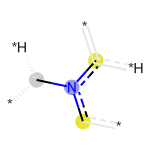

display: unable to open X server `' @ error/display.c/DisplayImageCommand/413.


In [11]:
#The following drawings are the bits correlating to the substructure: Amino Group
Draw.DrawMorganBit(m,577, bi1)

#This shows the nitrogen molecule and it's bindings
Draw.DrawMorganBit(m,935, bi1)

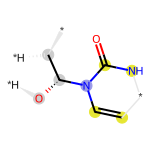

In [13]:
#This illustrates the pyrimidine ring and it's binding to the oxolane group with it's respective atom complexes. 
Draw.DrawMorganBit(m,1438, bi1)

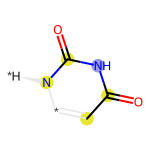

In [14]:
#This also shows the pyrimidine ring, however here is the NH the central atom. 
Draw.DrawMorganBit(m,564, bi1)

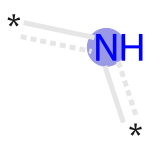

In [15]:
#This drawing is more zoomed in to this NH atom, to get a beter understanding of it's atom complexes
Draw.DrawMorganBit(m,1114, bi1)

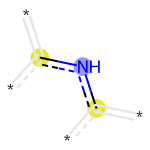

In [16]:
#This drawing gives the relations between the NH and the C atoms in the pyrimidine ring. These C atoms are yellow highlighted, which indicates that these are aromatic atoms. 
Draw.DrawMorganBit(m,1745, bi1)

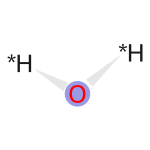

In [17]:
#This gives the atom complexes of the O
Draw.DrawMorganBit(m,656, bi1)

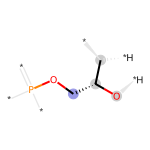

In [18]:
#This drawing shows how the atoms are placed for the C atom that binds through the O atom the phosphate group
Draw.DrawMorganBit(m,863, bi1)

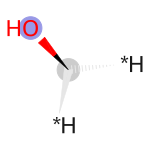

In [19]:
#This drawing displays how the OH group is organized
Draw.DrawMorganBit(m,1257, bi1)

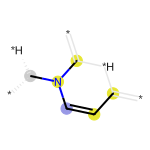

In [20]:
#Here the pyrimidine ring is displayed, with the double bounded C atom as the central atom. It shows the aromatic atoms in the pyrimidine ring.
Draw.DrawMorganBit(m,1522, bi1)

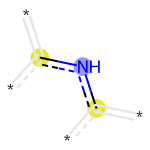

In [21]:
#This Morgan Bit drawing illustrates the atom complexes of the N atom in the pyrimmidine ring
Draw.DrawMorganBit(m,1745, bi1)

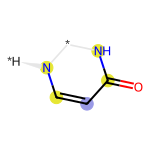

In [22]:
#This drawing of the bit 2000 shows a more complex structure of the pyrimidine ring. It gives a good insight into which atoms are aromatic in this ring
Draw.DrawMorganBit(m,2000, bi1)

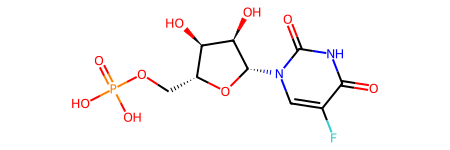

In [23]:
#Create the modified UMP molecule to see what are the changes. This is for the modified UMP molecule with an addition of fluor and OH group. 
m2 = Chem.MolFromSmiles('O=P(O)(O)OC([H])([C@@](O[C@]1(N2C([H])=C(C(N(C2=O)[H])=O)F)[H])([C@@](O[H])([C@@](O)1[H])[H])[H])')
m2

In [24]:
morganfp2=AllChem.GetMorganFingerprintAsBitVect(m2,useChirality=True, radius=2, nBits = 1024)

[23:08:13] DEPRECATION WARNING: please use MorganGenerator


In [25]:
#Convert the fingerprint to numpy array and identify the positions of the 1s. This is done for the modified UMP to see the interesting atom complexes.
mfpvector2 = np.array(morganfp2)
print(np.nonzero(mfpvector2))

(array([  59,   80,   90,   95,  112,  122,  176,  182,  192,  233,  253,
        288,  289,  295,  314,  337,  343,  349,  356,  363,  377,  445,
        464,  486,  577,  640,  650,  656,  692,  695,  699,  721,  725,
        750,  758,  795,  807,  814,  816,  849,  897,  904,  935,  989,
       1019]),)


In [26]:
#The process of creating the Morgan fingerprints as bit vector for the modified UMP.
bit={}
fp=AllChem.GetMorganFingerprintAsBitVect(m2,useChirality=True, radius=10, nBits = 124, bitInfo=bit)
print(bit)

{0: ((9, 3),), 2: ((20, 6),), 3: ((8, 2), (9, 4)), 4: ((1, 0),), 7: ((17, 1),), 9: ((13, 2),), 10: ((13, 0), (12, 1), (4, 3)), 13: ((8, 4),), 15: ((18, 2),), 16: ((4, 1), (20, 1)), 17: ((18, 1),), 18: ((14, 1), (20, 5)), 19: ((2, 0), (3, 0), (19, 0), (21, 0)), 21: ((13, 1), (8, 3)), 25: ((9, 1),), 26: ((20, 4),), 29: ((6, 3),), 30: ((15, 1), (16, 1)), 31: ((18, 3),), 32: ((11, 1), (6, 5)), 33: ((11, 2),), 34: ((8, 1),), 36: ((9, 2),), 41: ((19, 1), (21, 1)), 43: ((4, 0), (5, 2)), 45: ((20, 2),), 46: ((9, 5),), 47: ((7, 3),), 50: ((0, 1),), 51: ((7, 5),), 53: ((10, 0),), 54: ((6, 1),), 55: ((9, 0), (1, 1)), 59: ((6, 0), (8, 0), (18, 0), (20, 0)), 60: ((5, 1), (8, 5)), 64: ((10, 1),), 69: ((12, 2),), 70: ((14, 4),), 71: ((5, 4),), 74: ((0, 0), (15, 0), (16, 0), (13, 3)), 76: ((11, 0), (12, 0), (14, 0)), 78: ((6, 4),), 82: ((14, 3),), 84: ((5, 0),), 85: ((12, 3),), 89: ((10, 2),), 91: ((6, 2), (5, 3), (18, 4)), 98: ((20, 3),), 99: ((1, 2),), 108: ((7, 0), (17, 0)), 109: ((4, 2), (14, 2)),

[23:08:13] DEPRECATION WARNING: please use MorganGenerator


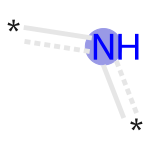

In [27]:
#With this the Morgan fingerprints of the modified UMP are drawn to gain an insight into how the molecules atoms are positioned.
Draw.DrawMorganBit(m2,10, bit)


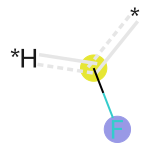

In [28]:
#This Morgan Bit drawing unveils how the atom complexes with the addition of Fluor have changed
Draw.DrawMorganBit(m2,7, bit)

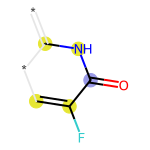

In [29]:
#Here it is also displayed how the pyrimidine ring atoms have changed with the addition of Fluor
Draw.DrawMorganBit(m2,69, bit)

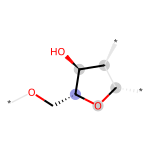

In [30]:
#This drawing shows the changes of the addition of OH to the oxolane group
Draw.DrawMorganBit(m2,91, bit)

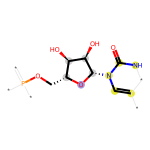

In [31]:
#This drawing gives a good overview of the whole molecule and how the atom complexes are described.
Draw.DrawMorganBit(m2,119, bit)

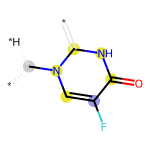

In [32]:
#This drawing gives an insight how the addition of the Fluor group affects the atom complexes in het pyrimidine ring
Draw.DrawMorganBit(m2,122, bit)

In [33]:
# Load molecules
mol1 = Chem.MolFromSmiles('O=c1ccn([C@@H]2O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1')
mol2 = Chem.MolFromSmiles('O=P(O)(O)OC([H])([C@@](O[C@]1(N2C([H])=C(C(N(C2=O)[H])=O)F)[H])([C@@](O[H])([C@@](O)1[H])[H])[H])')

# Generate Morgan fingerprints as bit vectors (1024 bits, radius 2)
m1 = AllChem.GetMorganFingerprintAsBitVect(mol1, radius=2, nBits=1024)
m2 = AllChem.GetMorganFingerprintAsBitVect(mol2, radius=2, nBits=1024)

# Calculate Tanimoto similarity
similarity = TanimotoSimilarity(m1, m2)
print(f"Tanimoto Similarity: {similarity}")


Tanimoto Similarity: 0.6470588235294118


[23:08:13] DEPRECATION WARNING: please use MorganGenerator
[23:08:13] DEPRECATION WARNING: please use MorganGenerator


### Tanimoto similarity test
For this Tanimoto similarity test, UMP and modified UMP (with the addition of fluorine and hydroxyl groups) were used. The Tanimoto similarity score ranges from 0 to 1, with 0 meaning there is no similarity at all and 1 indicating that the two compounds are identical. The score of 0.647 indicates a moderate level of similarity between UMP and modified UMP. This score also suggests that while the molecules have similar core structures, they may exhibit different biological activities and chemical properties. This is an interesting area for further investigation, as it could potentially lead to increased inhibition of TS. This makes the modified UMP a strong candidate for development as an improved drug for cancer treatment.



[23:08:13] DEPRECATION WARNING: please use MorganGenerator
[23:08:13] DEPRECATION WARNING: please use MorganGenerator
[23:08:13] DEPRECATION WARNING: please use MorganGenerator
[23:08:13] DEPRECATION WARNING: please use MorganGenerator
[23:08:13] DEPRECATION WARNING: please use MorganGenerator


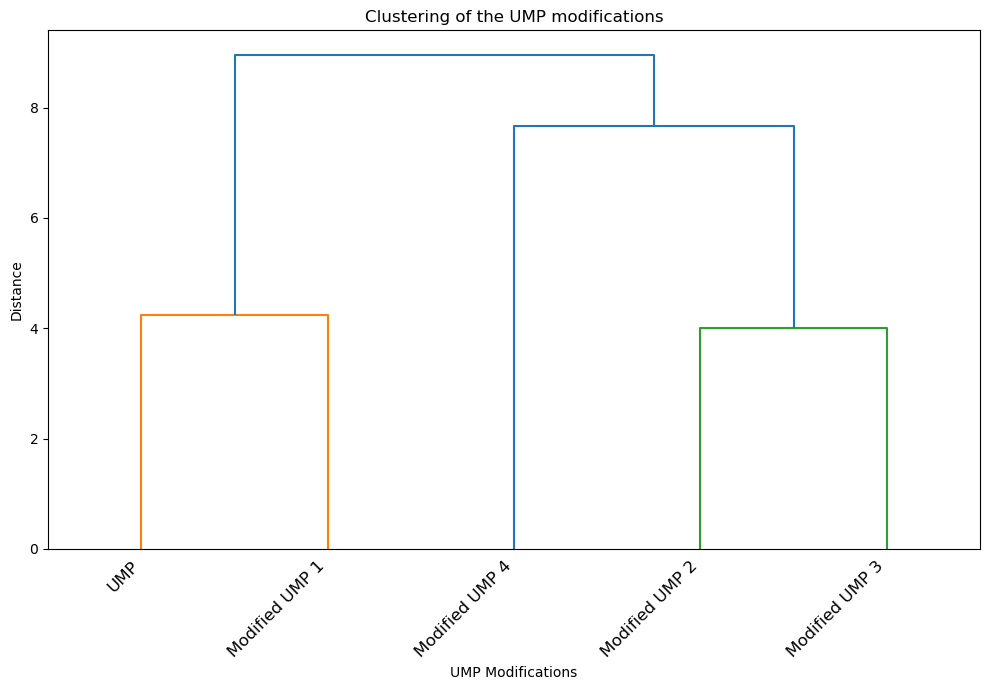

In [34]:
# Define UMP derivatives with labels
molecule_names = ['UMP', 'Modified UMP 1', 'Modified UMP 2', 'Modified UMP 3', 'Modified UMP 4']
smiles_list = [
    'O=c1ccn([C@@H]2O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1',  # UMP
    'O=P(O)(O)OC([H])([C@@](O[C@]1(N2C([H])=C(C(N(C2=O)[H])=O)F)[H])([C@@](O[H])([C@@](O)1[H])[H])[H])',  # Addition of Fluor to pyrimidine ring and OH to oxolane group
    'O=C(N1[H])N([C@@]2([H])[C@@](O)(F)[C@@](O[H])([H])[C@](C([H])([H])O[P@@](F)(O[H])=O)([H])O2)C(O)=C([H])C1',  # Addition of OH to pyrimidine ring 
    'O=C(N1[H])N([C@@]2([H])[C@@](O)(F)[C@@](O[H])(F)[C@](C([H])([H])O[P@@](F)(O[H])=O)([H])O2)C(O)=C([H])C1',  # Substitution of double bounded O for OH at pyrimidine ring
    '[H]O[P@](F)(OC([H])([C@@](O[C@]1(N2C(O)=C(C(N(C2=O)[H])=O)[H])[H])([C@@](O[H])([C@@](O)1F)[H])[H])[H])'   # Addition of OH to the oxolane group and substitution of double bounded O to OH on the phosphor group
]

# Generate RDKit molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Compute Morgan fingerprints for each molecule
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in molecules]

# Convert fingerprints to numpy array for clustering
fp_array = np.array([list(fp) for fp in fingerprints])

# Perform hierarchical clustering
Z = linkage(fp_array, method='ward')

# Create dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=molecule_names)

# Customize plot
plt.title('Clustering of the UMP modifications')
plt.xlabel('UMP Modifications')
plt.ylabel('Distance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()


### Dendogram of UMP
The figure above is a dendrogram, which shows the similarities between the different UMP molecules. It illustrates the relationships between the modified UMPs. UMP and the modified UMP1 have a distance of 4 between each other, which indicates that the molecules are somewhat chemically similar. This is also supported by the Tanimoto similarity score mentioned above. It suggests that UMP and modified UMP1 may have some similar biological effects, but there are likely some differences as well. This is desirable when designing a new molecule. The dendrogram also indicates that modified UMP2 and modified UMP3 are more similar to each other than to modified UMP4. This is important to consider when analyzing the molecules.

[23:08:13] DEPRECATION WARNING: please use MorganGenerator
[23:08:13] DEPRECATION WARNING: please use MorganGenerator
[23:08:13] DEPRECATION WARNING: please use MorganGenerator
[23:08:13] DEPRECATION WARNING: please use MorganGenerator
[23:08:13] DEPRECATION WARNING: please use MorganGenerator
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


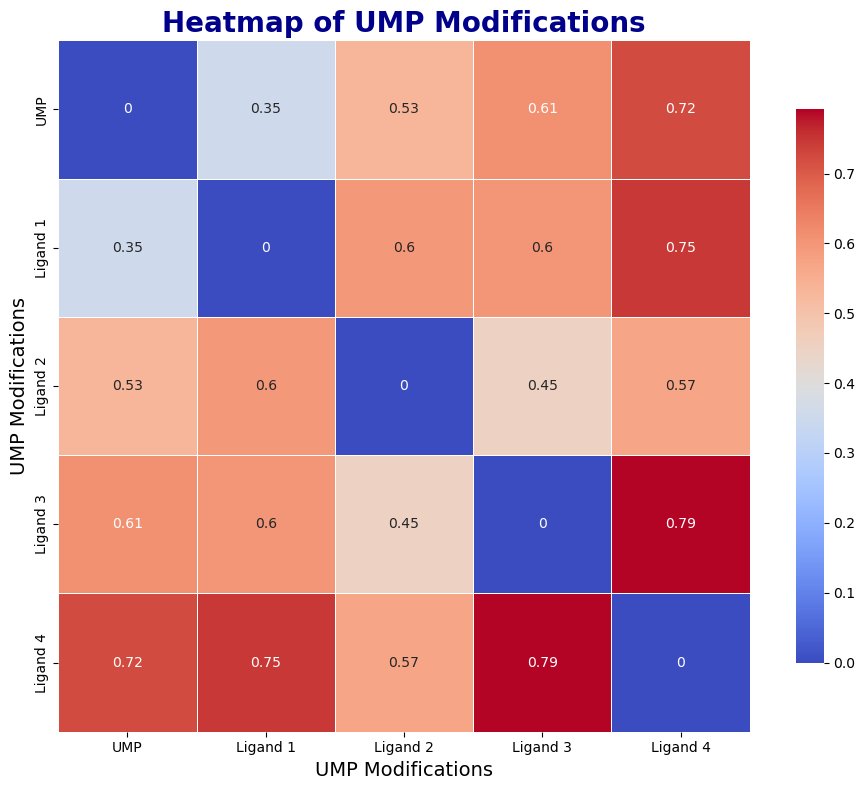

In [35]:

# List of UMP and modified UMP derivatives (SMILES format)
smiles_list = [
    'O=c1ccn([C@@H]2O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1',  # UMP
    'O=P(O)(O)OC([H])([C@@](O[C@]1(N2C([H])=C(C(N(C2=O)[H])=O)F)[H])([C@@](O[H])([C@@](O)1[H])[H])[H])',  # Ligand 1: Fluor to pyrimidine ring, OH to oxolane
    'O=C(N1[H])N([C@@]2([H])C([H])([H])[C@@](O[H])([H])[C@](C([H])([H])OP(O[H])(O[H])=O)([H])O2)C(O)=C([H])C1=O',  # Ligand 2: OH addition to pyrimidine ring
    'O=C1N([C@@]2([H])C([H])([H])[C@@](O[H])([H])[C@](C([H])([H])OP(O[H])(O[H])=O)([H])O2)C([H])=C([H])C(O)N1[H]',  # Ligand 3: Substitution of double-bonded O for OH on pyrimidine ring
    '[H]O[P@](F)(OC([H])([C@@](O[C@]1(N2C(O)=C(C(N(C2=O)[H])=O)[H])[H])([C@@](O[H])([C@@](O)1F)[H])[H])[H])'  # Ligand 4: OH addition to oxolane, substitution of O on phosphor group
]

# Generate RDKit molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Compute Morgan fingerprints for each molecule
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in molecules]

# Convert fingerprints to numpy array for clustering
fp_array = np.array([list(fp) for fp in fingerprints])

# Calculate pairwise distances using Jaccard metric
dist_matrix = pairwise_distances(fp_array, metric='jaccard')

# Define molecule names for labeling
molecule_names = ['UMP', 'Ligand 1', 'Ligand 2', 'Ligand 3', 'Ligand 4']

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dist_matrix, 
            annot=True,            # Annotate cells with distance values
            xticklabels=molecule_names, 
            yticklabels=molecule_names, 
            cmap='coolwarm',       # Color map for better visualization
            square=True,           # Ensure square-shaped cells
            linewidths=0.5,        # Line width between cells
            linecolor='white',     # Border color of cells
            cbar_kws={"shrink": .8}) # Adjust color bar size

# Customize the plot
plt.title('Heatmap of UMP Modifications', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('UMP Modifications', fontsize=14)
plt.ylabel('UMP Modifications', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent clipping

# Show plot
plt.show()


### Heatmap UMP
This heatmap provides a visual representation of the similarities between the different UMP modifications. In this heatmap, 1 indicates perfect correlation and 0 indicates that there is no correlation between the molecules. Ligand 3 and Ligand 4 show the highest correlation, with a score of 0.79. This could suggest a strong relationship in their modifications and a similar biological effect of the modifications. The lowest correlation is between Ligand 1 and UMP, which indicates that the addition of fluorine altered the composition of the molecule, resulting in a lower correlation to UMP. This could imply that the addition of fluorine and the hydroxyl group has altered the chemical structure and atomic complexes of the molecule. Consequently, Ligand 1 is likely to have a different biological effect than UMP.

In [36]:
>>> from rdkit import Chem
>>> mol = Chem.MolFromSmiles('O=c1ccn([C@@H]2O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1')
>>> mol2 = Chem.MolFromSmiles('O=P(O)(O)OC([H])([C@@](O[C@]1(N2C([H])=C(C(N(C2=O)[H])=O)F)[H])([C@@](O[H])([C@@](O)1[H])[H])[H])')
mol3 = Chem.MolFromSmiles('O=C(N1[H])N([C@@]2([H])C([H])([H])[C@@](O[H])([H])[C@](C([H])([H])OP(O[H])(O[H])=O)([H])O2)C(O)=C([H])C1=O')
mol4 = Chem.MolFromSmiles('O=C1N([C@@]2([H])C([H])([H])[C@@](O[H])([H])[C@](C([H])([H])OP(O[H])(O[H])=O)([H])O2)C([H])=C([H])C(O)N1[H]')

In [37]:
>>> from rdkit.Chem import Draw
>>> from rdkit.Chem.Draw import SimilarityMaps
>>> fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
>>> fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
>>> fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')

[23:08:14] DEPRECATION WARNING: please use AtomPairGenerator
[23:08:14] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[23:08:14] DEPRECATION WARNING: please use MorganGenerator


[23:08:14] DEPRECATION WARNING: please use MorganGenerator
[23:08:14] DEPRECATION WARNING: please use MorganGenerator


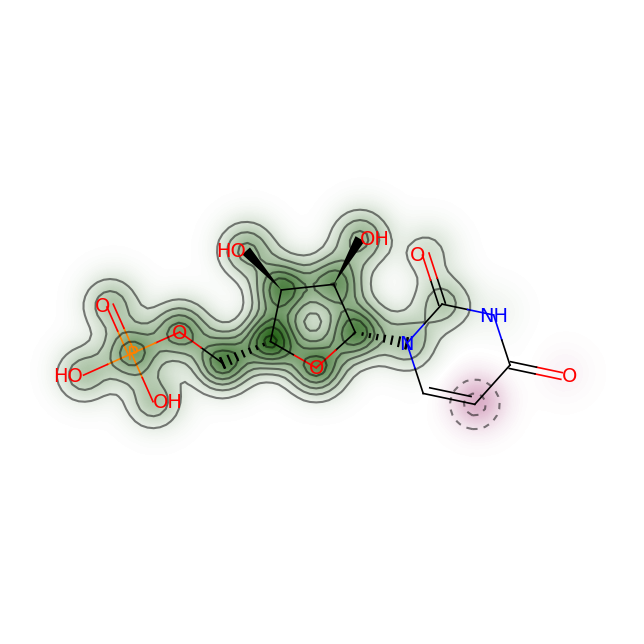

In [38]:
>>> fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint( mol2, mol, SimilarityMaps.GetMorganFingerprint)

# Similarity map
The Similarity Map above shows the contribution of the atoms to the similarity between UMP and UMP modification 1. This was the most interesting UMP modification identified so far. The color scheme is as follows: removing bits decreases similarity (i.e., positive difference) (green), no change in similarity (gray), and removing bits increases similarity (i.e., negative difference) (pink). 

The similarity map shows a purple ring at the site where fluorine is added to the pyrimidine ring. According to the color scheme, this indicates that removing bits increases the similarity. Therefore, the addition of fluorine has decreased the similarity, which is desirable. The green indications on the hydroxyl groups show that removing these bits decreases similarity, suggesting that modifications at this site could potentially lead to more efficient inhibition of TS.

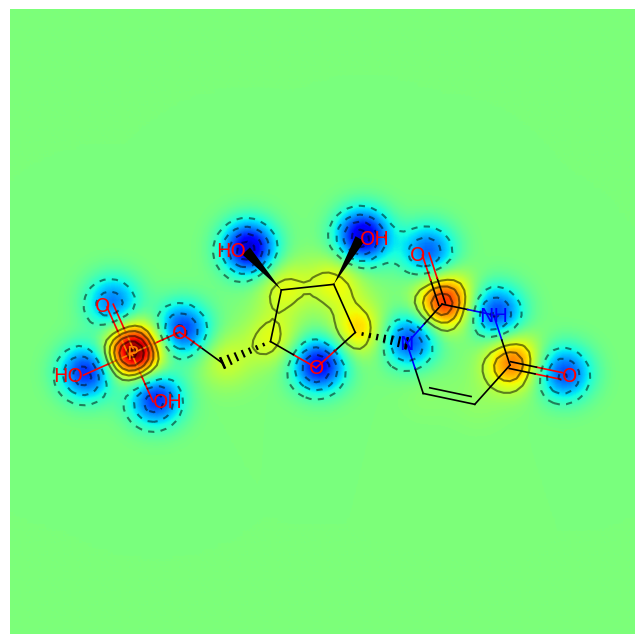

In [39]:
>>> from rdkit.Chem.Draw import SimilarityMaps
>>> mol = Chem.MolFromSmiles('O=c1ccn([C@@H]2O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1')
>>> AllChem.ComputeGasteigerCharges(mol)
>>> contribs = [float(mol.GetAtomWithIdx(i).GetProp('_GasteigerCharge')) for i in range(mol.GetNumAtoms())]
>>> fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

This similarity map of UMP shows the atomic contribution of the different groups. The visualization represents the Gasteiger partial charges. Red indicates regions with negative electrostatic potential, while blue indicates regions of positive electrostatic potential. The blue areas are electron-deficient, and the red areas are electron-rich. This map provides an overview of how the electrons are distributed and which areas can be modified.

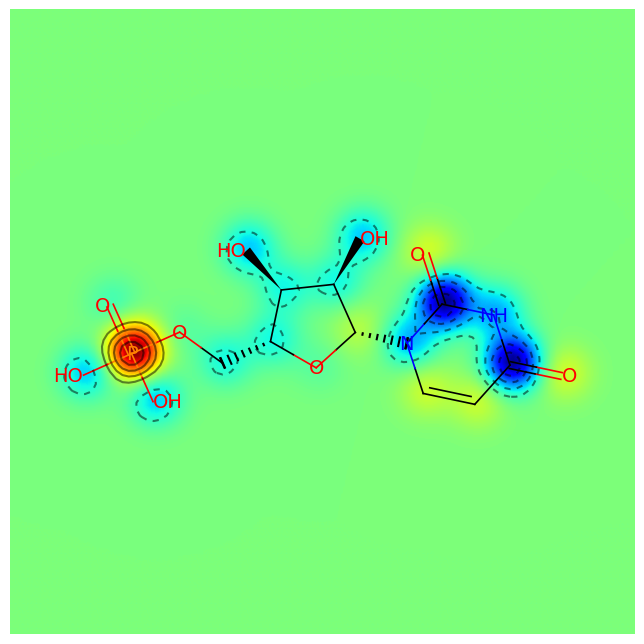

In [40]:
>>> from rdkit.Chem import rdMolDescriptors
>>> contribs = rdMolDescriptors._CalcCrippenContribs(mol)
>>> fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], colorMap='jet', contourLines=10)

This similarity map also shows the electron charges of the different regions, but it is based on the Crippen contributions to LogP. This approach supports the assessment of the influence exerted by different atomic types within a molecule on its LogP value. The red areas indicate that molecular modifications in these regions would increase the LogP, which implies that adding atoms or groups here will make the molecule more hydrophobic. In the case of UMP, this applies to the phosphate group, so modifications to this group would increase the hydrophobicity of the molecule. 

The blue regions in this map indicate areas where modifications would decrease the LogP, suggesting that modifications or additions to these groups would render the molecule more hydrophilic. Thus, this map provides insight into the implications of different modifications to the molecule regarding its characteristics.

### Conclusion Morgan Fingerprint notebook

The dendrogram shows that ligand 1 is the closest to the reference ligand, while the heatmap indicates that UMP and ligand 1 have the lowest correlation. This suggests a different biological effect for ligand 1 compared to the reference ligand when binding to TS.

In the similarity maps, it can be observed that the addition of a fluoride group significantly alters the ligand compared to the reference ligand. Therefore, the addition of the fluoride group is a likely candidate for creating a new interaction with the ligand, potentially leading to better inhibition effects.

Ligand 4 has the highest correlation with the reference ligand. However, upon observing the dendrogram, it is far removed from all other ligands, including the reference, indicating a different chemical structure. Its predicted effect is similar to UMP, making it a less interesting candidate for further investigation.

## References
(1) Riniker, S.; Landrum, G. A. “Similarity Maps - A Visualization Strategy for Molecular Fingerprints and Machine-Learning Methods” J. Cheminf. 5:43 (2013).